## tracking the detected pupil



In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
np.set_printoptions(precision=2, suppress=True)
# define plots to be inserted interactively
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


## and now... let's calibrate

we grab 42 frames. why 42? I recommend to not move the head (hold them in your hands) and to look at the led of your webcam. when it's lit, move your eyes evenly on the screen.

In [2]:
%%writefile calibration_fixation.py
import cv2
import time
from LeCheapEyeTracker import LeCheapEyeTracker, Canvas
from vispy import app
import numpy as np

N_frame = 42
et = LeCheapEyeTracker()
img0 = et.cam.grab()
def stim(t):
    img0 = et.cam.grab()
    H, W, three = img0.shape
    img = img0.copy()
    img = cv2.circle(img, (W//2, H//2), 12, (0,0,255), -1)
    return img

screen = Canvas(et, (stim, np.linspace(0, 3., 100)))
app.run()
et.close()

Overwriting calibration_fixation.py


In [3]:
%run calibration_fixation.py

/usr/local/lib/python3.5/site-packages/IPython/config.py:13: ShimWarning: The `IPython.config` package has been deprecated. You should import from traitlets.config instead.
  "You should import from traitlets.config instead.", ShimWarning)


In [4]:
%%writefile calibration_horizontal.py
import cv2
import time
from LeCheapEyeTracker import LeCheapEyeTracker, Canvas
from vispy import app
import numpy as np

N_frame = 42
et = LeCheapEyeTracker()
img0 = et.cam.grab()
H, W, three = img0.shape
img0 = np.zeros_like(img0)
timeline = np.linspace(0, 8., 100)
def stim(t):
    img = img0.copy()
    pos = W/2 + W/2 * np.sin(2*np.pi*t)
    img = cv2.circle(img, (int(pos), H//2), 12, (0,0,255), -1)
    return img

screen = Canvas(et, (stim, timeline))
app.run()
et.close()
print(screen.et.eye_pos)

Overwriting calibration_horizontal.py


In [5]:
%run calibration_horizontal.py

  File "/usr/local/Cellar/python3/3.5.1/Frameworks/Python.framework/Versions/3.5/lib/python3.5/runpy.py", line 170, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/local/Cellar/python3/3.5.1/Frameworks/Python.framework/Versions/3.5/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python3.5/site-packages/traitlets/config/application.py", line 592, in launch_instance
    app.start()
  File "/usr/local/lib/python3.5/site-packages/ipykernel/kernelapp.py", line 403, in start
    ioloop.IOLoop.instance().start()
  File "/usr/local/lib/python3.5/site-packages/zmq/eventloop/ioloop.py", line 162, in start
    super(ZMQIOLoop, self).start()
  File "/usr/local/lib/python3.5/site-packages/tornado/ioloop.py", line 883, in start
    handler_func(fd_obj, events)
  File "/usr/local/lib/python3.5/site-packages/tornado/sta

[[(19.0, 135.0), 107684.31110968], [(19.0, 125.0), 107684.430491897], [(19.0, 141.0), 107684.528763307], [(19.0, 167.0), 107687.203729144], [(19.0, 131.0), 107687.287834367], [(19.0, 121.0), 107687.36819086], [(19.0, 115.0), 107687.451718206], [(23.0, 121.0), 107687.532907328], [(19.0, 120.0), 107687.614817805], [(27.0, 118.0), 107687.690927358], [(177.0, 19.0), 107687.766800821], [(33.0, 119.0), 107687.842553133], [(42.0, 117.0), 107687.917247238], [(21.0, 123.0), 107687.992221828], [(19.0, 139.0), 107688.068092245], [(38.0, 121.0), 107688.146719575], [(35.0, 123.0), 107688.224741114], [(25.0, 128.0), 107688.303999346], [(21.0, 118.0), 107688.378325785], [(34.0, 131.0), 107688.453338516], [(38.0, 127.0), 107688.528880698], [(47.0, 126.0), 107688.604076824], [(53.0, 128.0), 107688.678932105], [(19.0, 99.0), 107688.754318481], [(19.0, 25.0), 107688.832983347], [(30.0, 23.0), 107688.912774384], [(56.0, 74.0), 107688.991723478], [(19.0, 43.0), 107689.073133183], [(41.0, 67.0), 107689.1546

107684.31110968 107692.353294989
[ 0.    0.09  0.17  0.77  0.73  0.68  0.63  0.58  0.53  0.48  0.43  0.37
  0.32  0.26  0.2   0.14  0.08  0.02 -0.04 -0.09 -0.15 -0.21 -0.27 -0.32
 -0.38 -0.44 -0.49 -0.55 -0.6  -0.65 -0.69 -0.74 -0.78 -0.82 -0.85 -0.88
 -0.91 -0.93 -0.95 -0.97 -0.98 -0.99 -1.   -1.   -1.   -0.99 -0.99 -0.97
 -0.96 -0.94 -0.92 -0.9  -0.87 -0.85 -0.81 -0.78 -0.74 -0.7  -0.66 -0.62
 -0.57 -0.52 -0.48 -0.43 -0.38 -0.33 -0.27 -0.22 -0.17 -0.11 -0.06 -0.  ]


(0.0, 8.0421853090083459, -1.2956861797611965, 1.0)

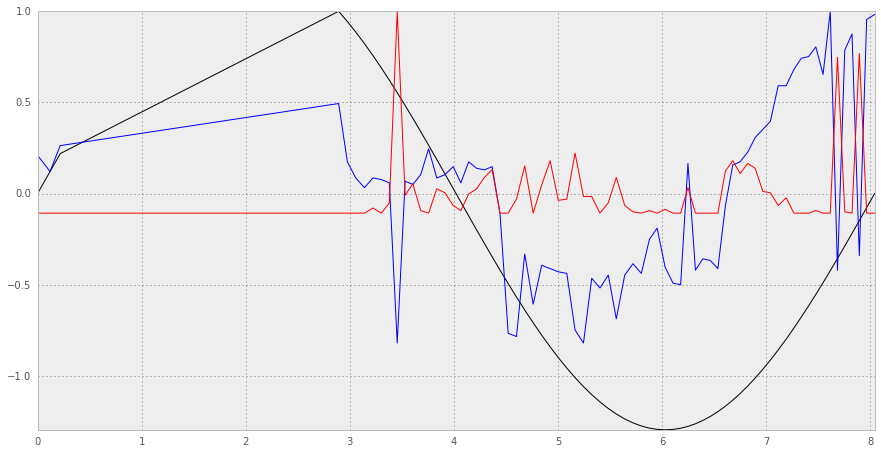

In [7]:

pos_true = []
timeline = []
pos_h, pos_w = [], []
t_max = screen.et.eye_pos[-1][1]
t_min = screen.et.eye_pos[0][1]
print(t_min, t_max)
for pos, t0 in screen.et.eye_pos:
    pos_true.append(np.sin(2*np.pi*(t0-t_min)/(t_max-t_min)))
    pos_w.append(pos[0])
    pos_h.append(pos[1]) 
    timeline.append(t0-t_min)

pos_true = np.array(pos_true)
print(pos_true)
pos_true /= pos_true.max()

pos_w = np.array(pos_w)
pos_w -= pos_w.mean()
pos_w /= pos_w.max()

pos_h = np.array(pos_h)
pos_h -= pos_h.mean()
pos_h /= pos_h.max()

fig, axs = plt.subplots(1, 1, figsize=(15, 7.5))
axs.plot(timeline, pos_true, 'k')
axs.plot(timeline, pos_h, 'b')
axs.plot(timeline, pos_w, 'r')
axs.axis('tight')

(-1.2956861797611965, 1.0, -0.81952662721893488, 1.0)

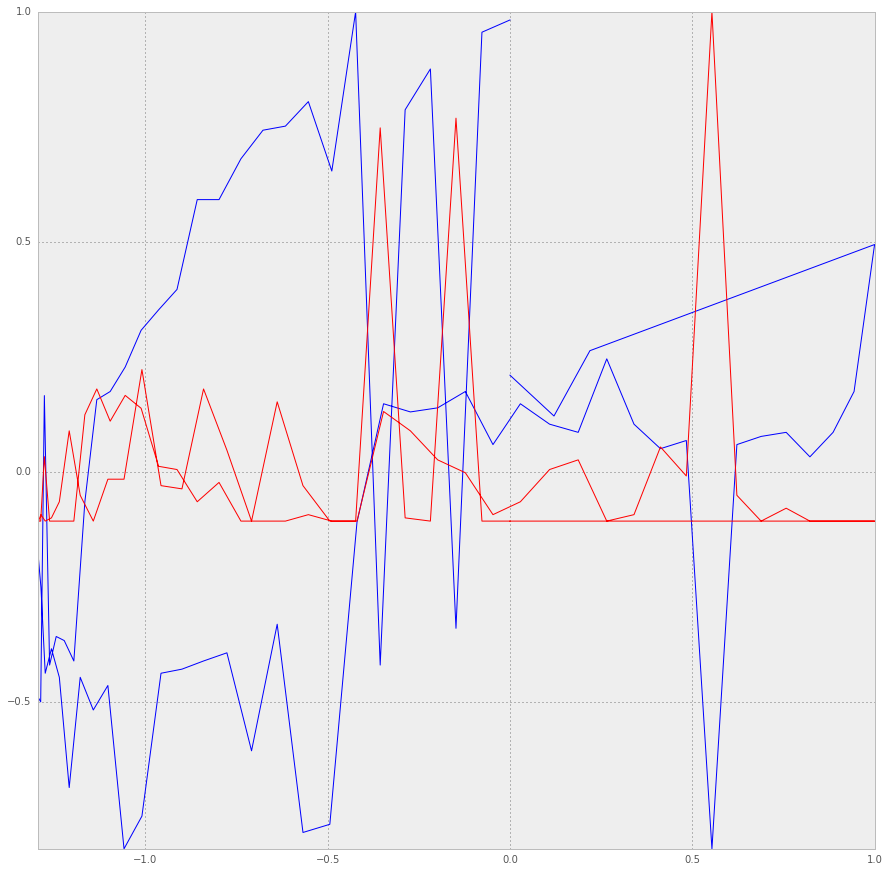

In [8]:
fig, axs = plt.subplots(1, 1, figsize=(15, 15))
axs.plot(pos_true, pos_h, 'b')
axs.plot(pos_true, pos_w, 'r')
axs.axis('tight')

Wow!